![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [5]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


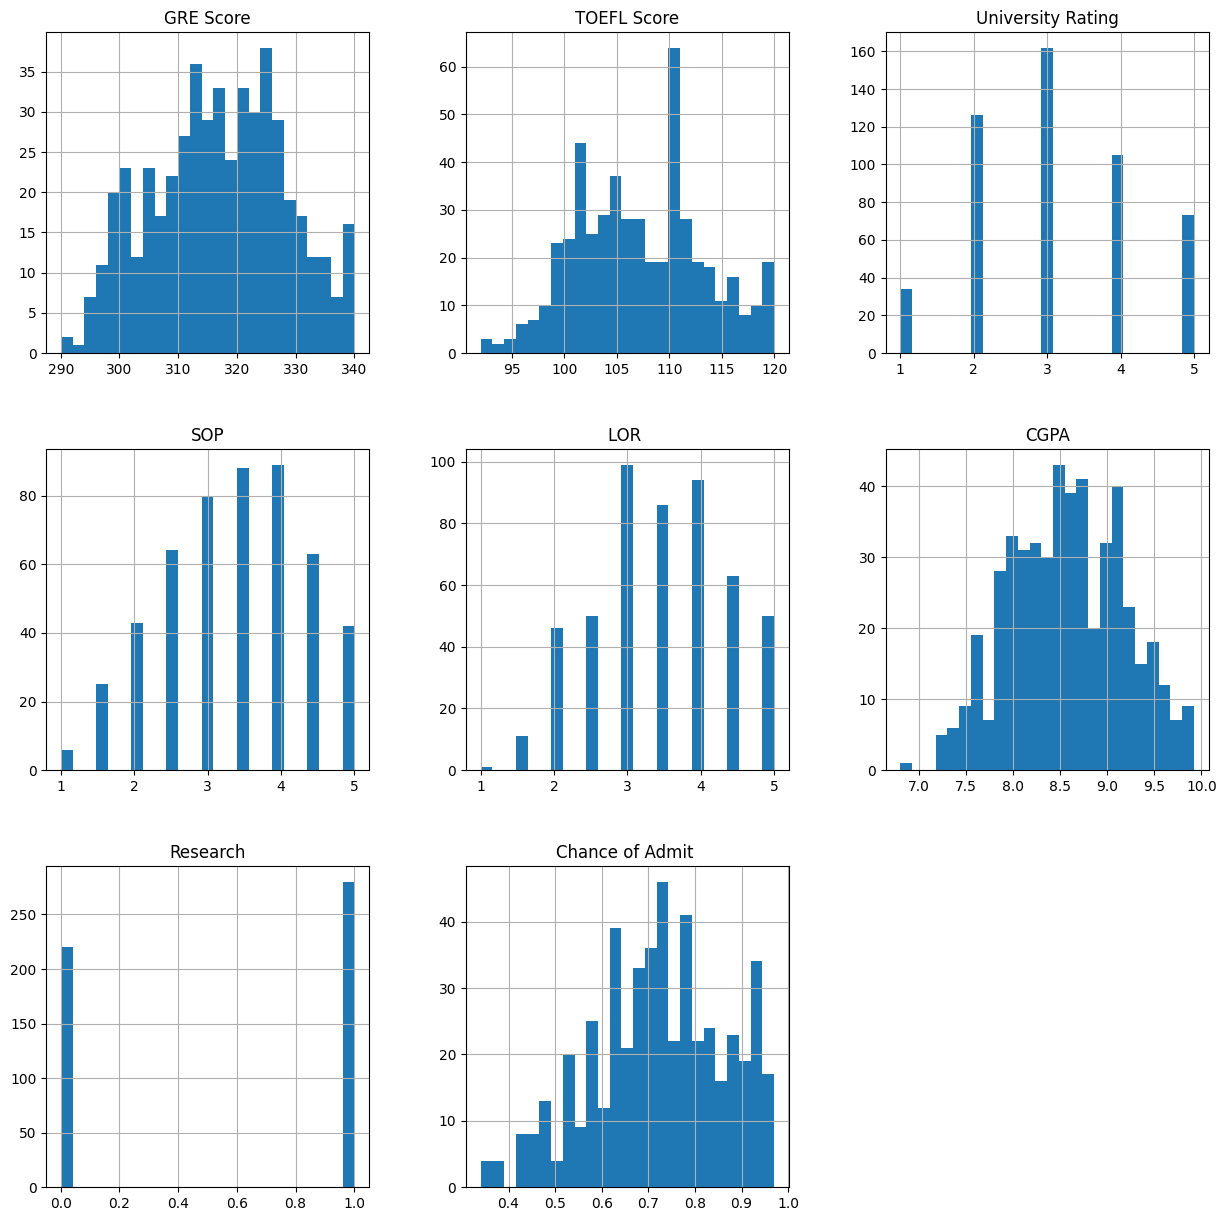

In [ ]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [ ]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [ ]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [ ]:
# Celda 1
# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Transformación de los set de entrenamiento y test
xTrain = pd.DataFrame(data=scaler.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
xTest = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

X_train = np.array(xTrain)
Y_train = np.array(yTrain)

X_test = np.array(xTest)
Y_test = np.array(yTest)

In [ ]:
# Definición de dimensiones de salida, varaibles de interés
output_var = 1 #Y_train.shape[1]
print(output_var, ' output variables')

1  output variables


In [ ]:
# Definición de dimensiones de entrada, varaibles predictoras
dims = X_train.shape[1]
print(dims, 'input variables')

7 input variables


In [ ]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **OPCION 1**: optimizador sgd

In [ ]:
# Importación librerías
from keras.utils import set_random_seed
from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint

set_random_seed(42)

K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None


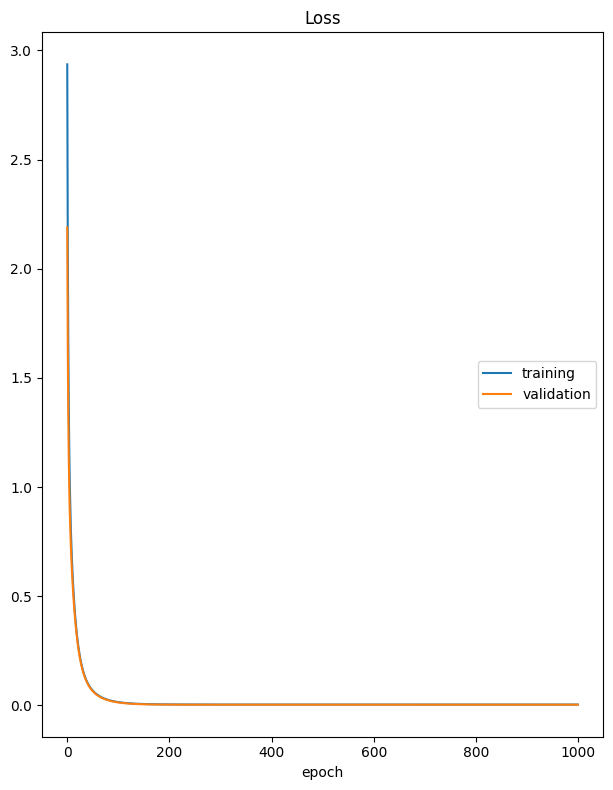

Loss
	training         	 (min:    0.004, max:    2.937, cur:    0.004)
	validation       	 (min:    0.003, max:    2.190, cur:    0.003)
3/3 [==============================] - 0s 193ms/step - loss: 0.0038 - val_loss: 0.0031


In [ ]:
# Entrenamiento de la red neuronal con 1000 épocas
history = model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=1000, 
          batch_size=128,
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

In [ ]:
print("Época de menor error", np.argmin(np.round(history.history['val_loss'],4))+1)

Época de menor error 230


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#PREDICCIONES TEST
y_pred = model.predict(X_test)
#METRICAS TEST
mse_test_1 = mean_squared_error(Y_test, y_pred)
mae_test_1 = mean_absolute_error(Y_test, y_pred)
print("MSE test:", mse_test_1)
print("MAE test:", mae_test_1)


#PREDICCIONES TRAIN
y_pred = model.predict(X_train)
#METRICAS TRAIN
mse_train_1 = mean_squared_error(Y_train, y_pred)
mae_train_1 = mean_absolute_error(Y_train, y_pred)
print("MSE train:", mse_train_1)
print("MAE train:", mae_train_1)


5/5 [==============================] - 0s 2ms/step
MSE test: 0.003117179128747054
MAE test: 0.04089441512425741
11/11 [==============================] - 0s 2ms/step
MSE train: 0.003749457569894776
MAE train: 0.043260222486087255


### **OPCION 2**: optimizador Adam

In [ ]:
K.clear_session()

model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='Adam', loss='mean_squared_error')

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None


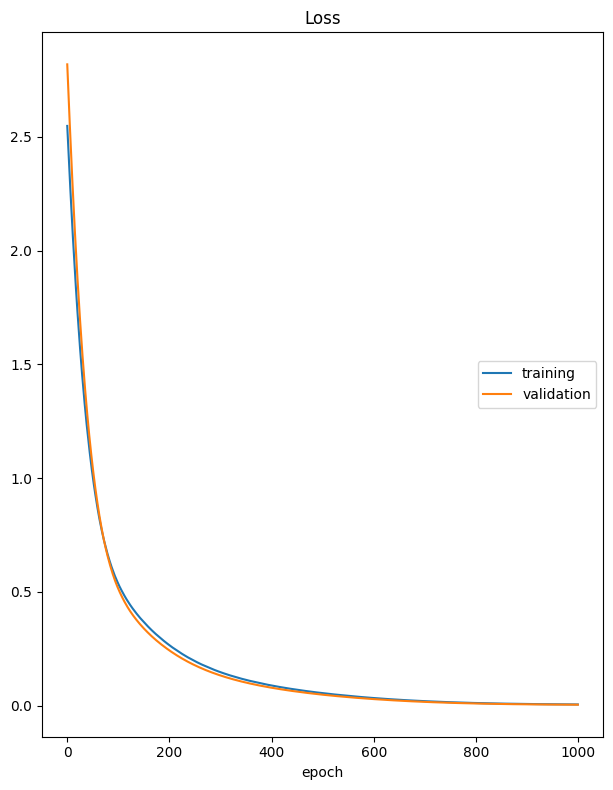

Loss
	training         	 (min:    0.005, max:    2.548, cur:    0.005)
	validation       	 (min:    0.004, max:    2.819, cur:    0.004)
3/3 [==============================] - 0s 185ms/step - loss: 0.0049 - val_loss: 0.0038


In [ ]:
# Entrenamiento de la red neuronal con 1000 épocas
history = model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=1000, 
          batch_size=128,
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

In [ ]:
print("Época de menor error", np.argmin(np.round(history.history['val_loss'],4))+1)

Época de menor error 997


In [ ]:

#PREDICCIONES TEST
y_pred = model.predict(X_test)
#METRICAS TEST
mse_test_1_o2 = mean_squared_error(Y_test, y_pred)
mae_test_1_o2 = mean_absolute_error(Y_test, y_pred)
print("MSE test:", mse_test_1_o2)
print("MAE test:", mae_test_1_o2)


#PREDICCIONES TRAIN
y_pred = model.predict(X_train)
#METRICAS TRAIN
mse_train_1_o2 = mean_squared_error(Y_train, y_pred)
mae_train_1_o2 = mean_absolute_error(Y_train, y_pred)
print("MSE train:", mse_train_1_o2)
print("MAE train:", mae_train_1_o2)


5/5 [==============================] - 0s 2ms/step
MSE test: 0.003812661955033277
MAE test: 0.04715986417929332
11/11 [==============================] - 0s 2ms/step
MSE train: 0.004928871955180579
MAE train: 0.051017682831627977


## Análisis de resultados

Para tratar de predecir probabilidad de admisión de los estudiantes se ejecutó una red neuronal de una capa con la librería Keras. 

Para esto se tienen varios parametros que se puede seleccionar. Por un lado, existe la función de pérdida que nos ayuda a cuantificar el desempeño del modelo, para esta utilizamos el error cuadrático medio ya que es un modelo de regresión. 

Luego debemos seleccionar el optimizador para ajustar los pesos de la red que me minimicen la función de pérdida. En este caso, validamos dos opciones que son:

*   SGD: Se actualizan los pesos en función del gradiente de la función de perdida
*   Adam: Los pesos se definen tanto por el gradiente como por una técnica de promedio de momentos para actualizar la tasa de aprendizaje de manera adaptativa. 

Al hacer uso de ambos optimizadores, obtenemos mejores resultados con el SGD.

Por último, es importante escoger el número de épocas ya que esto define la convergencia de la función de pérdida y la calidad de ajuste. En este caso utilizamos 1000 épocas para entender el problema y visualizar el comportamiento de los datos. Podemos notar que a partir de la época 230 se vuelve constante la función de pérdida pues no vuelve a disminuir el error.

Dadas estas selecciones, obtuvimos un error absoluto medio y error cuadrático medio uso optimizador sgd:

* MSE test: 0.003117179128747054
* MAE test: 0.04089441512425741




## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

### **OPCION 1**: optimizador sgd

In [ ]:
# Celda 2
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Agregar la primera capa oculta
model.add(Dense(256, input_shape=(dims,),activation='relu'))
#agregar la segunda capa
model.add(Dense(output_var,activation='relu'))

model.compile(optimizer='sgd', loss='mean_squared_error')

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________
None


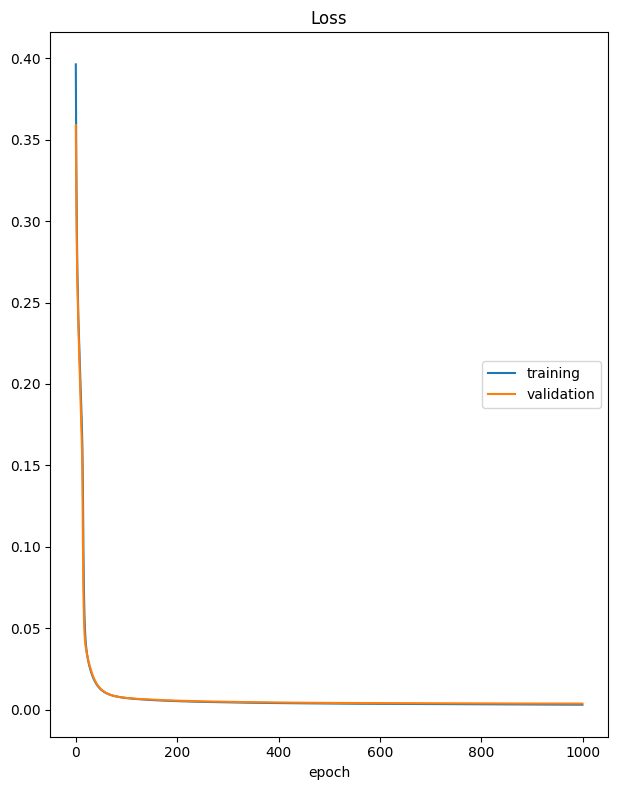

Loss
	training         	 (min:    0.003, max:    0.396, cur:    0.003)
	validation       	 (min:    0.004, max:    0.359, cur:    0.004)
3/3 [==============================] - 0s 195ms/step - loss: 0.0031 - val_loss: 0.0038


In [ ]:
# Entrenamiento de la red neuronal con 1000 épocas
history = model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=1000, 
          batch_size=128,
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

In [ ]:
print("Época de menor error", np.argmin(np.round(history.history['val_loss'],4))+1)

Época de menor error 793


In [ ]:
#PREDICCIONES TEST
y_pred = model.predict(X_test)
#METRICAS TEST
mse_test_2 = mean_squared_error(Y_test, y_pred)
mae_test_2 = mean_absolute_error(Y_test, y_pred)
print("MSE test:", mse_test_2)
print("MAE test:", mae_test_2)


#PREDICCIONES TRAIN
y_pred = model.predict(X_train)
#METRICAS TRAIN
mse_train_2 = mean_squared_error(Y_train, y_pred)
mae_train_2 = mean_absolute_error(Y_train, y_pred)
print("MSE train:", mse_train_2)
print("MAE train:", mae_train_2)


5/5 [==============================] - 0s 2ms/step
MSE test: 0.0037839131074200263
MAE test: 0.04455661145846049
11/11 [==============================] - 0s 2ms/step
MSE train: 0.0030866143790500276
MAE train: 0.039880535285813465


### **OPCION 2**: optimizador Adam

In [ ]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Agregar la primera capa oculta
model.add(Dense(256, input_shape=(dims,),activation='relu'))
#agregar la segunda capa
model.add(Dense(output_var,activation='relu'))

model.compile(optimizer='Adam', loss='mean_squared_error')

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________
None


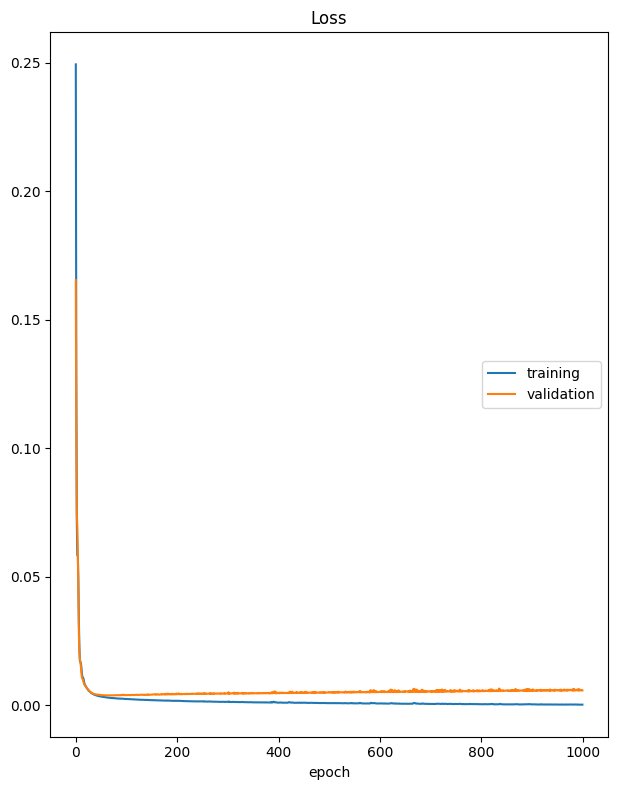

Loss
	training         	 (min:    0.000, max:    0.249, cur:    0.000)
	validation       	 (min:    0.004, max:    0.166, cur:    0.006)
3/3 [==============================] - 0s 181ms/step - loss: 2.9866e-04 - val_loss: 0.0058


In [ ]:
# Entrenamiento de la red neuronal con 1000 épocas
history = model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=1000, 
          batch_size=128,
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

In [ ]:
print("Época de menor error", np.argmin(np.round(history.history['val_loss'],4))+1)

Época de menor error 54


In [ ]:
#PREDICCIONES TEST
y_pred = model.predict(X_test)
#METRICAS TEST
mse_test_2_o2 = mean_squared_error(Y_test, y_pred)
mae_test_2_o2 = mean_absolute_error(Y_test, y_pred)
print("MSE test:", mse_test_2_o2)
print("MAE test:", mae_test_2_o2)


#PREDICCIONES TRAIN
y_pred = model.predict(X_train)
#METRICAS TRAIN
mse_train_2_o2 = mean_squared_error(Y_train, y_pred)
mae_train_2_o2 = mean_absolute_error(Y_train, y_pred)
print("MSE train:", mse_train_2_o2)
print("MAE train:", mae_train_2_o2)


5/5 [==============================] - 0s 2ms/step
MSE test: 0.00583961074580106
MAE test: 0.05684866530100505
11/11 [==============================] - 0s 2ms/step
MSE train: 0.00029637417353299144
MAE train: 0.01223557309763772


## Análisi de resultados

Igual que en el punto anterior, queremos predecir la probabilidad de admisión de los estudiantes, pero en este caso vamos a usar una red neuronal con dos capas. Utilizamos una capa adicional de 256 neuronas, realmente encontramos muchas recomendaciones a la hora de escoger el número de neuronas y capas a utilizar en una red neuronal, sin embargo no existe una regla de oro y es más un ejercicio de prueba y error.

Nuevamente vamos a usar el error cuadratico medio como función de perdida ya que es la métrica ya que es un problema de regresión. 
Al ensayar los dos optimizadores principales (SGD y Adam), de nuevo obtenemos mejores resultados con el optimizador del descenso del gradiente estocástico donde se actualizan los pesos de manera iterativa con muestras aleatorias del conjunto de datos. 

En este caso, escogimos 1000 épocas para poder evidenciar el comportamiento de convergencia y ajuste del modelo de manera gráfica. Podemos notar que a partir de alrededor de la época 790 el error deja de disminuir, y comienza a crecer muy lentamente.


Dadas estas selecciones, obtuvimos un error absoluto medio y error cuadrático medio uso optimizador sgd:

* MSE test: 0.0037839131074200263
* MAE test: 0.04455661145846049

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

### **OPCION 1**: optimizador sgd

In [ ]:
# Celda 3
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Agregar la primera capa oculta
model.add(Dropout(0.1, input_shape=(dims,)))
model.add(Dense(256,activation='relu'))
#agregar la segunda capa
model.add(Dropout(0.1))
model.add(Dense(output_var,activation='relu'))

model.compile(optimizer='sgd', loss='mean_squared_error')

# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1) 

# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 7)                 0         
                                                                 
 dense (Dense)               (None, 256)               2048      
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________
None


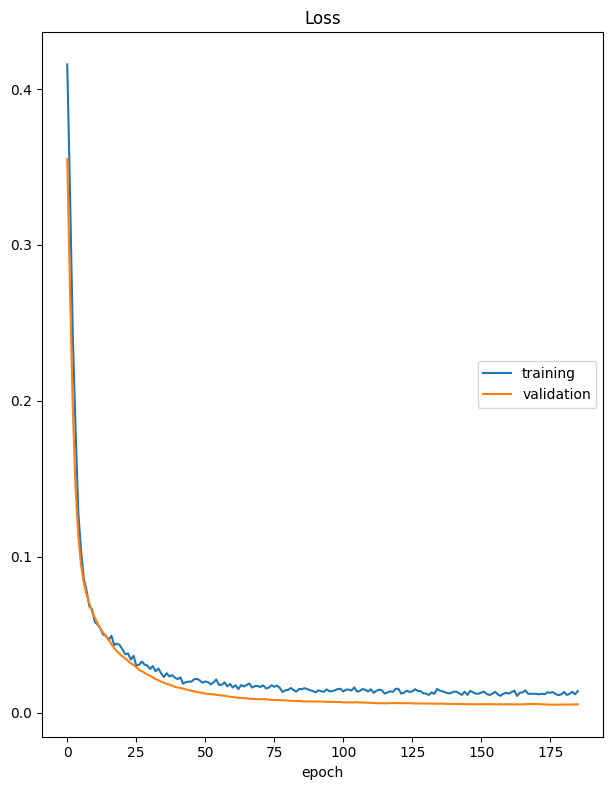

Loss
	training         	 (min:    0.011, max:    0.416, cur:    0.014)
	validation       	 (min:    0.005, max:    0.355, cur:    0.005)
3/3 [==============================] - 0s 180ms/step - loss: 0.0139 - val_loss: 0.0053
Epoch 186: early stopping


In [ ]:
# Entrenamiento de la red neuronal con 1000 épocas y early stopping
history = model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=1000, 
          batch_size=128,
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras(), best_model, early_stop])

In [ ]:
print("Época de menor error", np.argmin(np.round(history.history['val_loss'],4))+1)

Época de menor error 176


In [ ]:
# Cargamos el mejor modelo encontrado durante el proceso de entrenamiento
model.load_weights('best_model.h5')

#PREDICCIONES TEST
y_pred = model.predict(X_test)
#METRICAS TEST
mse_test_3 = mean_squared_error(Y_test, y_pred)
mae_test_3 = mean_absolute_error(Y_test, y_pred)
print("MSE test:", mse_test_3)
print("MAE test:", mae_test_3)


#PREDICCIONES TRAIN
y_pred = model.predict(X_train)
#METRICAS TRAIN
mse_train_3 = mean_squared_error(Y_train, y_pred)
mae_train_3 = mean_absolute_error(Y_train, y_pred)
print("MSE train:", mse_train_3)
print("MAE train:", mae_train_3)


5/5 [==============================] - 0s 2ms/step
MSE test: 0.005121057323959646
MAE test: 0.05636386292775472
11/11 [==============================] - 0s 2ms/step
MSE train: 0.0054509438551146976
MAE train: 0.05883601856912886


### **OPCION 2**: optimizador Adam

In [ ]:
# Celda 3
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Agregar la primera capa oculta
model.add(Dropout(0.1, input_shape=(dims,)))
model.add(Dense(256,activation='relu'))
#agregar la segunda capa
model.add(Dropout(0.1))
model.add(Dense(output_var,activation='relu'))

model.compile(optimizer='Adam', loss='mean_squared_error')

# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1) 

# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 7)                 0         
                                                                 
 dense (Dense)               (None, 256)               2048      
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________
None


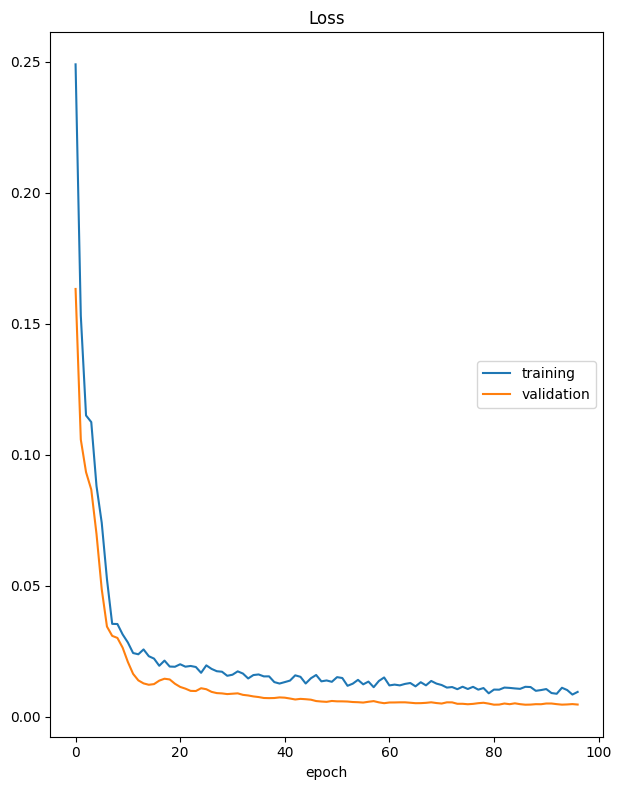

Loss
	training         	 (min:    0.008, max:    0.249, cur:    0.009)
	validation       	 (min:    0.005, max:    0.163, cur:    0.005)
3/3 [==============================] - 0s 206ms/step - loss: 0.0095 - val_loss: 0.0046
Epoch 97: early stopping


In [ ]:
# Entrenamiento de la red neuronal con 1000 épocas y early stopping
history = model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=1000, 
          batch_size=128,
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras(), best_model, early_stop])

In [ ]:
print("Época de menor error", np.argmin(np.round(history.history['val_loss'],4))+1)

Época de menor error 81


In [ ]:
# Cargamos el mejor modelo encontrado durante el proceso de entrenamiento
model.load_weights('best_model.h5')

#PREDICCIONES TEST
y_pred = model.predict(X_test)
#METRICAS TEST
mse_test_3_o2 = mean_squared_error(Y_test, y_pred)
mae_test_3_o2 = mean_absolute_error(Y_test, y_pred)
print("MSE test:", mse_test_3_o2)
print("MAE test:", mae_test_3_o2)


#PREDICCIONES TRAIN
y_pred = model.predict(X_train)
#METRICAS TRAIN
mse_train_3_o2 = mean_squared_error(Y_train, y_pred)
mae_train_3_o2 = mean_absolute_error(Y_train, y_pred)
print("MSE train:", mse_train_3_o2)
print("MAE train:", mae_train_3_o2)


5/5 [==============================] - 0s 2ms/step
MSE test: 0.004569869407435869
MAE test: 0.052196453237533566
11/11 [==============================] - 0s 1ms/step
MSE train: 0.0037568084247009744
MAE train: 0.04802781783512661


## Análisis de resultados

En este caso usamos una red neuronal con dos capas, early stopping y dropout. Así mismo guardamos el mejor modelo encontrado durante el proceso de entrenamiento.

Nuevamente usamos el error cuadrático medio como función de perdida ya que es un modelo de regresión. Al ensayar los dos optimizadores principales (SGD y Adam). En este caso obtenemos mejores resultados con el optimizador Adam.

También volvimos a escoger 1000 épocas y dejamos que el early stopping se encargue de detener el entrenamiento en las épocas donde no se disminuya el error. Se definió un patience para early stopping de 10, indicando que tendrá paciencia durante 10 épocas para verificar que el error disminuya, si no disminuye durante esas épocas se detiene el entrenamiento. Para nuestro caso el entrenamiento se detuvo en la época 97

Escogimos utilizar 2 capas ocultas, 256 neuronas y un dropout de 0.1, teniendo en cuenta nuevamente que no hay una regla de oro para escoger estos parámetros y más bien es un ejercicio de prueba y error. Igualmente, decidimios no utilizar muchas capas ocultas ni gran número de neuronas teniendo encuenta que para el ejercicio hay muy pocos datos (500) y las redes neuronales tienden a sobre ajustarse muy rápidamente, especialmente cuando hay pocos datos.

Dadas estas selecciones, obtuvimos un error absoluto medio y error cuadrático medio uso optimizador Adam:

* MSE test: 0.004569869407435869
* MAE test: 0.052196453237533566

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

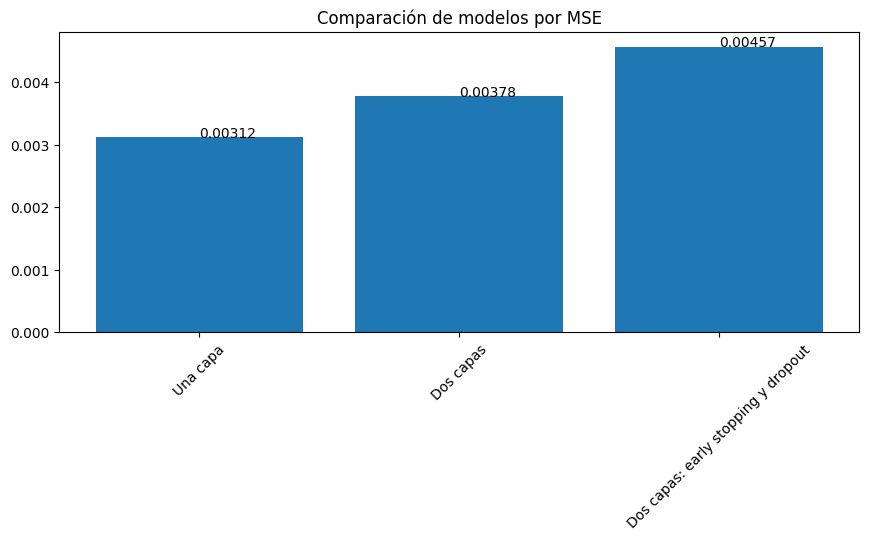

In [ ]:
# Celda 4
fig = plt.figure(figsize=[8,3])
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos por MSE")
#faltan los de filtrado
ejeX = ['Una capa','Dos capas','Dos capas: early stopping y dropout']
ejeY = [mse_test_1,mse_test_2,mse_test_3_o2]
ejeY = [round(v,5) for v in ejeY]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.xticks(rotation = 45)
plt.show()

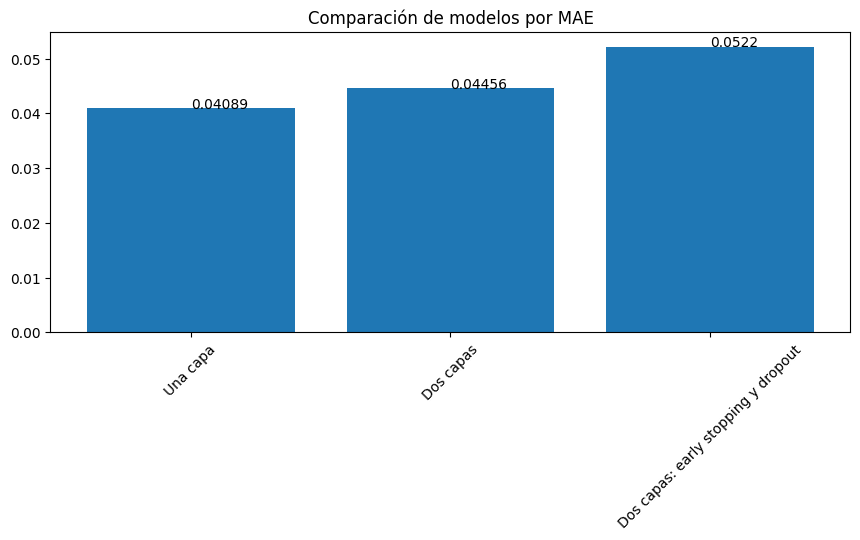

In [ ]:
fig = plt.figure(figsize=[8,3])
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos por MAE")
#faltan los de filtrado
ejeX = ['Una capa','Dos capas','Dos capas: early stopping y dropout']
ejeY = [mae_test_1,mae_test_2,mae_test_3_o2]
ejeY = [round(v,5) for v in ejeY]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.xticks(rotation = 45)
plt.show()

Para las métricas utilizamos la opción del optimizador que nos dio mejor resultado, el cual fue el SGD para las redes de una y dos capas, y Adam para la opción con early stopping y dropout.

Al observar los resultados, nos damos cuenta que el error aumenta al intentar utilizar redes más complejas, de más de una capa o usando dropout (aunque las diferencias son realmente muy pequeñas). Esto se debe seguramente al hecho de que tenemos muy pocos datos (350 registros para entrenamiento) y las redes neuronales tienden a sobre ajustarse muy fácilmente y especialmente cuando hay muy pocos datos.


* **Ventajas del mejor modelo** 
1.   Es una red neuronal simple, con una sola capa, lo cual la hace más fácil de entrenar e interpretar sus resultados.
2.   El tiempo de entrenamiento es menor, ya que la red es menos compleja

* **Desventajas del modelo con el menor desempeño**
1. Al ser una red neuronal más compleja, con más capas y uso de dropout, se vuelve más dificil el querer interpretar el por qué la red arroja dichos resultados.
2. Requiere más tiempo de entrenamiento y mayores recursos de memoria.
3. Al utilizar early stopping, se corre el riesgo de interrumpir el proceso de entrenamiento en una época muy temprana sabiendo que puede ser probable que en posteriores épocas el error pueda mejorar, por ese motivo el parámetro patience se convierte en otro hyper parámetro a optimizar lo cual vuelve más complejo el problema.

 